In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, SGD


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(tf.__version__)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.12.0


In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Посмотрим структуры полученного массива данных:

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
len(X_train)

60000

In [6]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(y_test_labels)

10000

In [9]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Конкретный пример изображений с помощью matplotlib:

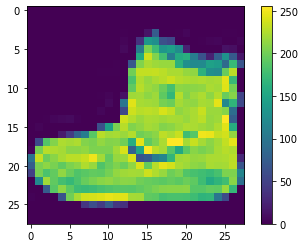

In [11]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Посмотрим первые 25 изображений:

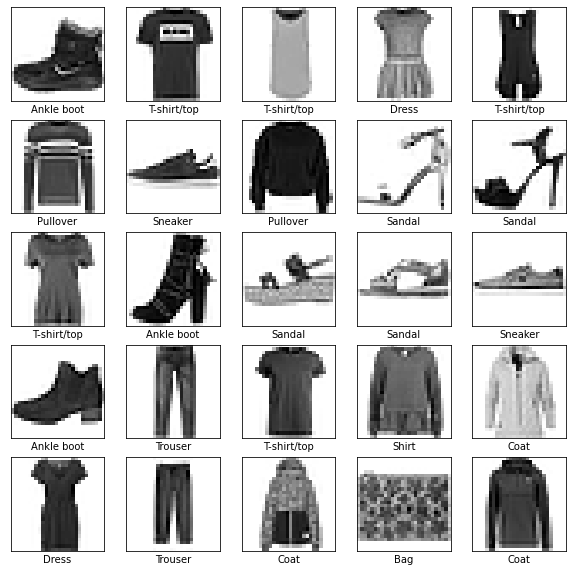

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_labels[i]])
plt.show()

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

Создадим 3 слоя нейронной сети с помощью функционала Keras.layers

Соберем модель в функциональной форме (функциональное API Keras) 

Сеть собираем как последовательности соединей узлов:
 
 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10) 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/5
235/235 [==============================] - 3s 9ms/step - loss: 0.6126 - accuracy: 0.7949 - val_loss: 0.4878 - val_accuracy: 0.8278
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.4314 - accuracy: 0.8496 - val_loss: 0.4330 - val_accuracy: 0.8481
Epoch 3/5
235/235 [==============================] - 2s 7ms/step - loss: 0.3885 - accuracy: 0.8647 - val_loss: 0.4297 - val_accuracy: 0.8458
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.3658 - accuracy: 0.8711 - val_loss: 0.3939 - val_accuracy: 0.8626
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.3410 - accuracy: 0.8788 - val_loss: 0.3986 - val_accuracy: 0.8585


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3986 - accuracy: 0.8585 - 847ms/epoch - 3ms/step

Test accuracy: 0.8585000038146973


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети, если точность на тестовых данных нас не устраивает.

In [18]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 165ms/step


array([[-4.368218 , -8.902218 , -3.5273223, -4.109103 , -3.2955863,
         3.7841837, -3.7994044,  3.6661108,  1.1802522,  6.488647 ]],
      dtype=float32)

In [19]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
probability_model = Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [21]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
predictions[0]

array([1.7032195e-05, 1.8288566e-07, 3.9488277e-05, 2.2070091e-05,
       4.9786307e-05, 5.9130911e-02, 3.0081890e-05, 5.2545585e-02,
       4.3746363e-03, 8.8379019e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Matplotlib нам дает возможность посмотреть наше предсказание графически:

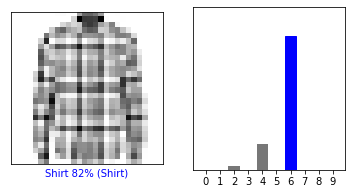

In [25]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

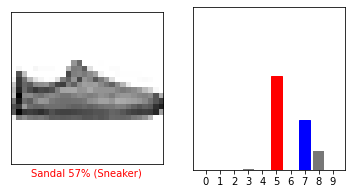

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test_labels, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test_labels)
plt.show()

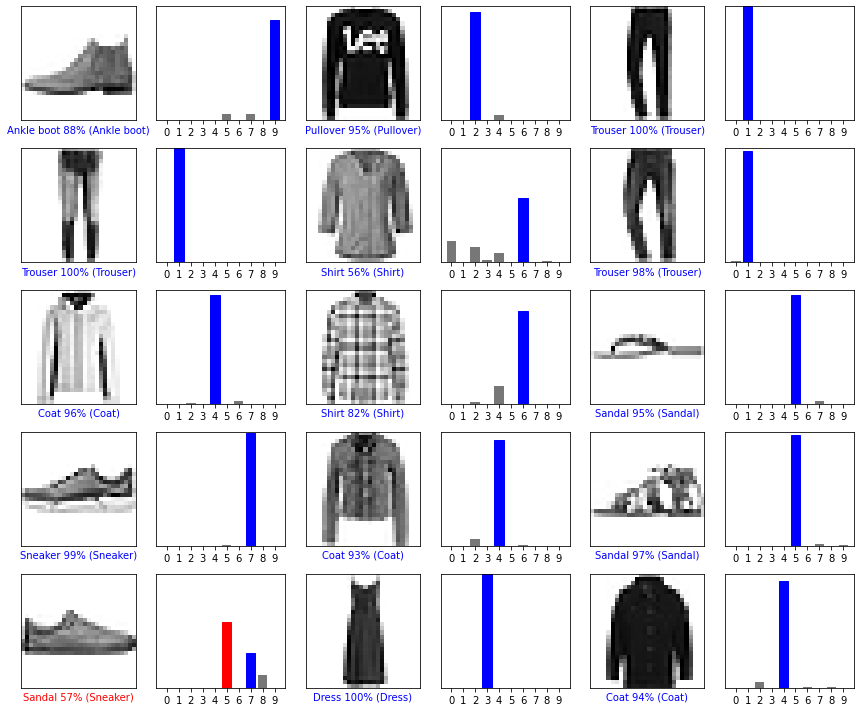

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)

plt.tight_layout()
plt.show()

Возьмем одно изображение из тестовой выборки и посмотрим предсказание нейронной сети.

In [28]:
i = 0
img = X_test[i]

print(img.shape)

(28, 28)


In [29]:
imgs = np.expand_dims(img, 0)

print(imgs.shape)

print(img.reshape((1, img.shape[0], img.shape[0])).shape)
print(img[None].shape)

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(imgs)

predictions_single

1/1 [==============================] - 0s 47ms/step


array([[1.7032271e-05, 1.8288631e-07, 3.9488343e-05, 2.2070129e-05,
        4.9786391e-05, 5.9131056e-02, 3.0081885e-05, 5.2545700e-02,
        4.3746415e-03, 8.8379002e-01]], dtype=float32)

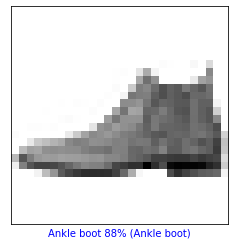

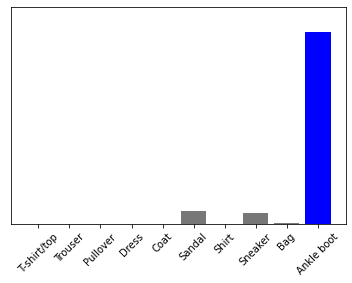

In [31]:
plot_image(i, predictions, y_test_labels, X_test)
plt.show()
plot_value_array(i, predictions_single, y_test_labels)
plt.xticks(range(10), class_names, rotation=45);

In [32]:
np.argmax(predictions_single[0])

9

анализ ошибок модели

In [33]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:10]

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [34]:
CM = confusion_matrix(y_test_labels, y_pred)
print(CM)

[[823   0  19  55  10   0  77   0  16   0]
 [  3 950   2  33   9   0   1   0   2   0]
 [ 13   0 698  15 232   0  38   0   4   0]
 [ 21   5  11 889  50   1  18   0   5   0]
 [  0   0  47  30 900   0  21   0   2   0]
 [  0   0   0   1   0 954   0  29   2  14]
 [134   1 108  46 182   0 514   0  15   0]
 [  0   0   0   0   0  29   0 938   1  32]
 [  3   1   5   4   8   2   4   4 969   0]
 [  0   0   0   1   0   7   1  41   0 950]]


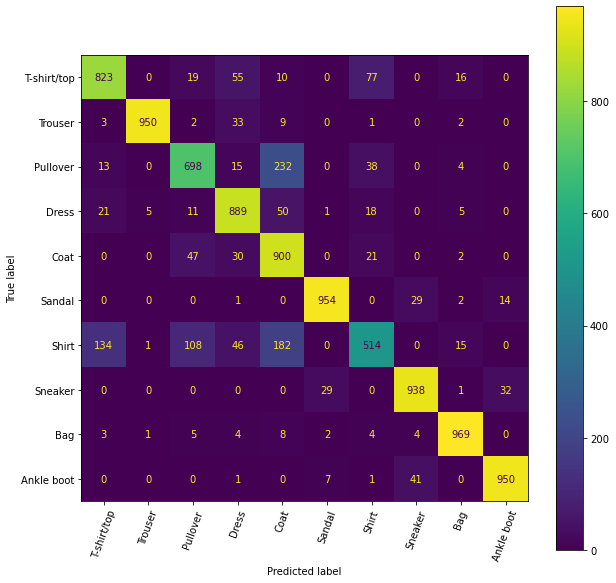

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

# **Ансамбль сетей**

Использование функционального API для построения сложных сетей

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание


In [36]:
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))


input = Input(shape=(28, 28))
x = Flatten()(input)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model3 = Model(input, output)

In [37]:
model1.compile(optimizer='rmsprop',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
model3.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])


hist1 = model1.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist2 = model2.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))
print()
hist3 = model3.fit(X_train, y_train_labels,
                   epochs=5,
                   batch_size=256,
                   validation_data=(X_test, y_test_labels))

Epoch 1/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6521 - accuracy: 0.7730 - val_loss: 0.5153 - val_accuracy: 0.8152
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.4546 - accuracy: 0.8397 - val_loss: 0.4649 - val_accuracy: 0.8342
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.4021 - accuracy: 0.8575 - val_loss: 0.4171 - val_accuracy: 0.8537
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.3717 - accuracy: 0.8661 - val_loss: 0.4440 - val_accuracy: 0.8369
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.3468 - accuracy: 0.8742 - val_loss: 0.4307 - val_accuracy: 0.8485

Epoch 1/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6285 - accuracy: 0.7828 - val_loss: 0.4733 - val_accuracy: 0.8384
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.4338 - accuracy: 0.8457 - val_loss: 0.4751 - val_accuracy: 0.8303
Epoch 3/5


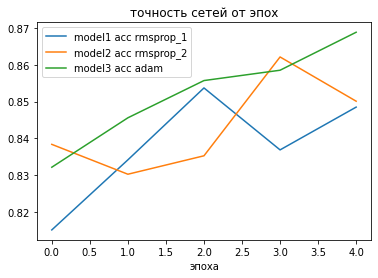

In [38]:
plt.plot(hist1.history['val_accuracy'], label='model1 acc rmsprop_1')
plt.plot(hist2.history['val_accuracy'], label='model2 acc rmsprop_2')
plt.plot(hist3.history['val_accuracy'], label='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [39]:
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

CM1 = confusion_matrix(y_test_labels, y_pred1)
CM2 = confusion_matrix(y_test_labels, y_pred2)
CM3 = confusion_matrix(y_test_labels, y_pred3)

313/313 [==============================] - 1s 3ms/step


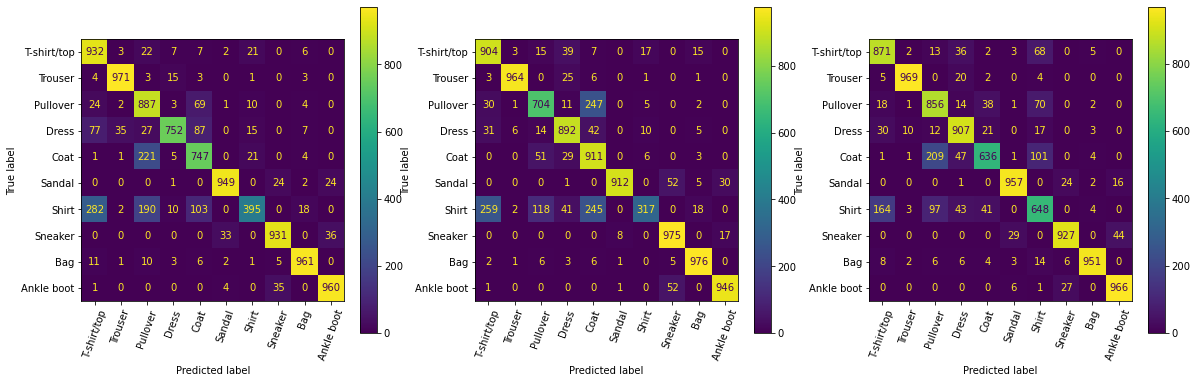

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=class_names)
disp1.plot(ax=ax1, values_format='.3g')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)

disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=class_names)
disp2.plot(ax=ax2, values_format='.3g')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)

disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=class_names)
disp3.plot(ax=ax3, values_format='.3g')
plt.xticks(rotation=70)

plt.show()

In [41]:
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

Сделаем предсказание на тестовом изображении

In [42]:
y_pred_proba = model3.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 [==============================] - 1s 3ms/step


Отобразим значения на выходах сети (10 выходов - 10 точек графика)

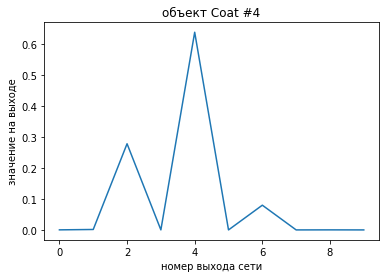

In [43]:
N = 10 
plt.plot(y_pred_proba[N, :])
plt.title(f'объект {class_names[y_test_labels[N]]} #{str(y_test_labels[N])}')
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [44]:
test_loss, test_acc = model1.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model2.evaluate(X_test, y_test_labels, verbose=2)
test_loss, test_acc = model3.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 0.4307 - accuracy: 0.8485 - 950ms/epoch - 3ms/step
313/313 - 1s - loss: 0.4258 - accuracy: 0.8501 - 896ms/epoch - 3ms/step
313/313 - 1s - loss: 0.3706 - accuracy: 0.8688 - 1s/epoch - 3ms/step


Усреднение моделей

In [45]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)


out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

In [46]:
model_all.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 128)          100480      ['flatten_4[0][0]']              
                                                                                                  
 dense_10 (Dense)               (None, 256)          200960      ['flatten_4[0][0]']              
                                                                                            

In [64]:
plot_model(model_all)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
predictions_single = model_all.predict(imgs)
predictions_single

1/1 [==============================] - 0s 183ms/step


array([[0.08653846, 0.08653638, 0.08653687, 0.08653648, 0.08653753,
        0.08943965, 0.08654016, 0.0928739 , 0.08661893, 0.21184164]],
      dtype=float32)

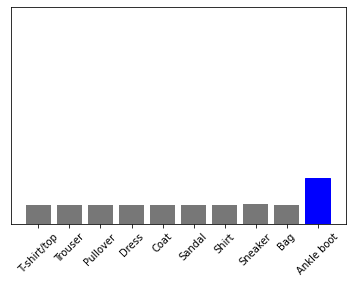

In [49]:
plot_value_array(0, predictions_single, y_test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [50]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

C:\Users\User\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 2s - loss: 1.6400 - accuracy: 0.8720 - 2s/epoch - 5ms/step


313/313 [==============================] - 1s 4ms/step


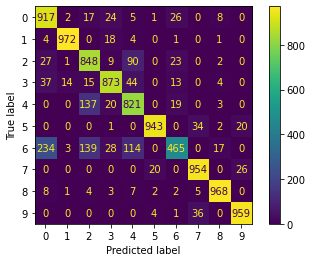

In [51]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [52]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=5,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

Epoch 1/5


C:\Users\User\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 [==============================] - 6s 17ms/step - loss: 1.5963 - accuracy: 0.8819 - val_loss: 1.6010 - val_accuracy: 0.8709
Epoch 2/5
235/235 [==============================] - 4s 16ms/step - loss: 1.5840 - accuracy: 0.8887 - val_loss: 1.5970 - val_accuracy: 0.8756
Epoch 3/5
235/235 [==============================] - 4s 16ms/step - loss: 1.5780 - accuracy: 0.8930 - val_loss: 1.5951 - val_accuracy: 0.8759
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 1.5736 - accuracy: 0.8960 - val_loss: 1.5917 - val_accuracy: 0.8764
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 1.5695 - accuracy: 0.9002 - val_loss: 1.5900 - val_accuracy: 0.8771


313/313 [==============================] - 1s 4ms/step


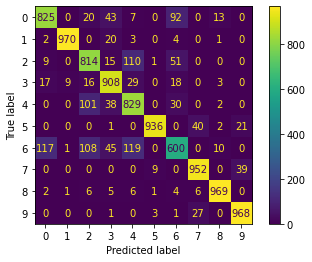

In [53]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [54]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 1.5900 - accuracy: 0.8771 - 1s/epoch - 4ms/step


Поличилось улучшить accuracy с 0.8684 до 0.8787.
Далее попробуем дообучить модель

Обучение только новых слоев. Старые слои моделей замораживаем и не обучаем.

In [55]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(128, activation='relu')(flat)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)
# не обучаем слои модели
for layer in model1.layers:
    layer.trainable = False


x2 = Dense(256, activation='relu')(flat)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)
# не обучаем слои модели
for layer in model2.layers:
    layer.trainable = False


x3 = Dense(256, activation='relu')(flat)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)
# не обучаем слои модели
for layer in model3.layers:
    layer.trainable = False


out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])


out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])


model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

model_all.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 128)          100480      ['flatten_5[0][0]']              
                                                                                                  
 dense_16 (Dense)               (None, 256)          200960      ['flatten_5[0][0]']              
                                                                                            

In [56]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 2s - loss: 1.6400 - accuracy: 0.8720 - 2s/epoch - 5ms/step


In [57]:
for layer in model_all.layers[:]:
    layer.trainable = True

model_all.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 128)          100480      ['flatten_5[0][0]']              
                                                                                                  
 dense_16 (Dense)               (None, 256)          200960      ['flatten_5[0][0]']              
                                                                                            

In [58]:
model_all.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [59]:
hist1 = model_all.fit(X_train, y_train_labels,
                      epochs=10,
                      batch_size=256,
                      validation_data=(X_test, y_test_labels))

Epoch 1/10
235/235 [==============================] - 6s 18ms/step - loss: 1.5964 - accuracy: 0.8812 - val_loss: 1.6032 - val_accuracy: 0.8700
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 1.5844 - accuracy: 0.8890 - val_loss: 1.5984 - val_accuracy: 0.8724
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 1.5774 - accuracy: 0.8931 - val_loss: 1.5930 - val_accuracy: 0.8772
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 1.5731 - accuracy: 0.8964 - val_loss: 1.5898 - val_accuracy: 0.8808
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 1.5688 - accuracy: 0.9004 - val_loss: 1.5886 - val_accuracy: 0.8787
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 1.5658 - accuracy: 0.9034 - val_loss: 1.5882 - val_accuracy: 0.8800
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 1.5633 - accuracy: 0.9053 - val_loss: 1.5846 - val_accuracy: 0.8828

In [60]:
test_loss, test_acc = model_all.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 1.5805 - accuracy: 0.8856 - 1s/epoch - 3ms/step


In [61]:
model_all.save('model_all.h5')

In [62]:
model_loaded = tf.keras.models.load_model('model_all.h5')
test_loss, test_acc = model_loaded.evaluate(X_test, y_test_labels, verbose=2)

313/313 - 1s - loss: 1.5805 - accuracy: 0.8856 - 1s/epoch - 4ms/step


В итоге дообучения удалось улучшить значение accuracy с 0.8684 до 0,8809.